# Optimising Your Finances II: OCBC vs. DBS vs. UOB vs. MayBank
Back in Oct 18, I wrote about [optimising bank interest](https://chrischow.github.io/dataandstuff/2018-10-13-optimising-your-bank/). It was a shootout between OCBC's 360 account, UOB's One account, and MayBank's SaveUp account, in which the **SaveUp** was the first choice. The **One** account complemented the SaveUp nicely. However, OCBC and MayBank changed their policies with effect from 1 Apr 19, invalidating my previous analysis. Hence, it is timely for a new exercise in optimisation. In addition to the SaveUp, 360, and One accounts, I will be adding the DBS **Multiplier** account to the analysis.

In [1]:
# Import required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from matplotlib.lines import Line2D

# Settings
%matplotlib inline
warnings.filterwarnings('ignore')

# Meet the Contenders
As in the first post, I summarise the interest rates on the 360, One, SaveUp, and Multiplier accounts.

## OCBC 360 Account
The 360 account offers the following with effect from 1 Apr 2019:  
  
| Action                                    | First \$35,000     | \$35,001 to \$70,000 |
|-------------------------------------------|--------------------|----------------------|
| Base Interest                             | 0.05%              | 0.05%                |
| Credit Salary via GIRO                    | 1.20%              | 2.00%                |
| Spend \$500 on OCBC Credit Cards          | 0.30%              | 0.60%                |
| Insure or Invest with OCBC                | 0.60%              | 1.20%                |
| Increase Monthly Account Balance by \$500 | 0.30%              | 0.60%                |
| Increase Monthly Account Balance          | 1.00% on Increment | 1.00% on Increment   |
| Account Balance is \$200,000 & Above      | 1.00%              | 1.00%                |  
  
The only change is in the increase in bonus from crediting salary from 1.50% for the second \$35,000 in bank balances to a whopping **2.00%**.  
  
*Source: [OCBC](https://www.ocbc.com/personal-banking/accounts/360-account.html)*

## UOB One Account
There has been no change to the One account's interest:  
  
![](https://www.uob.com.sg/web-resources/common/images/column-tiles/rates-table.jpg)

*Source: [UOB](https://www.uob.com.sg/personal/save/chequeing/one-account.page)*

## MayBank SaveUp Account
The SaveUp account now pays bonus interest only on the first **\$50,000** in your account instead of **\$60,000** previously, and has combined the GIRO payments and salary credit criteria into **a single criterion**. This makes it more difficult to meet the criteria for 3 products or services.
  
| Action                 | Up to \$50,000 |
|------------------------|----------------|
| Base Interest          | 0.3125%        |
| 1 Product or Service   | 0.30%          |
| 2 Products or Services | 0.80%          |
| 3 Products or Services | 2.75%          |
  
The products and services include:  
  
1. Spend \$500 on the Platinum Visa Card or Horizon Visa Signature Card
2. Bill payments of \$300 by GIRO
3. Minimum \$2,000 salary credited via GIRO **OR** Minimum education loan of \$10,000
4. Minimum education loan of \$10,000
5. Minimum home loan of \$200,000
6. Minimum car loan of \$35,000
7. Life insurance with a minimum annual premium of \$5,000
8. Renovation loan of \$10,000
9. Minimum investment of \$25,000 in unit trusts or \$30,000 in structured deposits  
  
*Source: [MayBank](http://info.maybank2u.com.sg/saveup/)*

## DBS Multiplier Account
The Multiplier account rewards you for (1) crediting your salary and (2) making at least one more transaction in the following categories:  
  
1. Spending on DBS/POSB credit cards
2. Home loan instalments
3. Insurance
4. Investments (unit trusts, equities, or dividends crediting)
  
An interesting feature of the Multiplier is that bonus interest is awarded based on the **total transaction value per month**. The interest schedule is as follows:  
  

In [3]:
# Create data frame
multiplier = pd.DataFrame([
    {'Eligible Transactions': 'Less than \$2,000', 'Salary + 1 Criterion': 0.005, 'Salary + 2 or more Criteria': 0.005},
    {'Eligible Transactions': '\$2,000 - \$2,500', 'Salary + 1 Criterion': 0.0155, 'Salary + 2 or more Criteria': 0.018},
    {'Eligible Transactions': '\$2,500 - \$5,000', 'Salary + 1 Criterion': 0.0185, 'Salary + 2 or more Criteria': 0.02},
    {'Eligible Transactions': '\$5,000 - \$15,000', 'Salary + 1 Criterion': 0.0190, 'Salary + 2 or more Criteria': 0.022},
    {'Eligible Transactions': '\$15,000 - \$30,000', 'Salary + 1 Criterion': 0.02, 'Salary + 2 or more Criteria': 0.023},
    {'Eligible Transactions': '\$30,000 or more', 'Salary + 1 Criterion': 0.0208, 'Salary + 2 or more Criteria': 0.035}
])

# Percentages
multi_display = multiplier.copy()
multi_display['Salary + 1 Criterion'] = ['{0:.2f}%'.format(x * 100) for x in multi_display['Salary + 1 Criterion']]
multi_display['Salary + 2 or more Criteria'] = ['{0:.2f}%'.format(x * 100) for x in multi_display['Salary + 2 or more Criteria']]

# Print
multi_display

,Eligible Transactions,Salary + 1 Criterion,Salary + 2 or more Criteria
0,"Less than \$2,000",0.50%,0.50%
1,"\$2,000 - \$2,500",1.55%,1.80%
2,"\$2,500 - \$5,000",1.85%,2.00%
3,"\$5,000 - \$15,000",1.90%,2.20%
4,"\$15,000 - \$30,000",2.00%,2.30%
5,"\$30,000 or more",2.08%,3.50%


*Source: [DBS](https://www.dbs.com.sg/personal/landing/dbs-multiplier/)*

## The Competing Demands
In summary, the competing demands are:  
  
| Transaction  | 360  | One      | SaveUp  | Multiplier |
|:------------:|:----:|:--------:|:-------:|:----------:|
| Salary       | Yes  | Optional | Yes     | Yes        |
| GIRO         | No   | Optional | Yes     | No         |
| Credit Cards | Yes  | Yes      | Yes     | Yes        |
  
This means that for salary crediting, we can only choose one account, unless you have multiple sources of steady salary. For GIRO transactions, we can have both the One **and** SaveUp accounts. For credit card transactions, it depends entirely on your spending. If your monthly expenditure is high enough, you can meet the criteria for any combination or all of these accounts.

# Yield Curves
In this section, I compute the "yield curves" for the three banks with the assumption that you are able to capture the full bonus interest from performing all three of the abovementioned transactions under each bank account, separately.
  
## OCBC 360 Account
First, we set up a table with savings of \$2,000 to \$90,000:  

In [4]:
# Set up table
ocbc = pd.DataFrame(np.arange(2000, 91000, 1000), columns = ['savings'])

Next, assuming we (1) credit our salary, (2) spend \$500 on OCBC credit cards, and (3) increase our monthly balance, we compute the interest for each level of savings.

In [5]:
# Compute base interest
ocbc['base_interest'] = ocbc.savings * 0.0005

# Set up columns for bonus interest
ocbc['salary'] = 0
ocbc['credit_cards'] = 0
ocbc['monthly_balance'] = 0
ocbc['thresh0'] = 0
ocbc['thresh1'] = 35000
ocbc['thresh2'] = 70000
ocbc['diff'] = ocbc.savings - ocbc.thresh1
ocbc['diff'] = ocbc[['thresh0', 'diff']].copy().max(axis = 1)
ocbc['diff2'] = ocbc.savings - ocbc.thresh2
ocbc['diff2'] = ocbc[['thresh0', 'diff2']].copy().max(axis = 1)

# Copy data
ocbc_old = ocbc.copy()

# Compute interest for salary
ocbc.salary = ocbc[['savings', 'thresh1']].min(axis = 1) * 0.012 + \
    ocbc[['thresh1', 'diff']].min(axis = 1) * 0.02 + \
    ocbc.diff2 * 0.0005

# Compute interest for credit cards
ocbc.credit_cards = ocbc[['savings', 'thresh1']].min(axis = 1) * 0.003 + \
    ocbc[['thresh1', 'diff']].min(axis = 1) * 0.006 + \
    ocbc.diff2 * 0.0005

# Compute interest for monthly balance
ocbc.monthly_balance = ocbc[['savings', 'thresh1']].min(axis = 1) * 0.003 + \
    ocbc[['thresh1', 'diff']].min(axis = 1) * 0.006 + \
    ocbc.diff2 * 0.0005

# Compute total interest
ocbc['total_interest'] = ocbc.base_interest + ocbc.salary + ocbc.credit_cards + \
    ocbc.monthly_balance

# Compute effective interest rate (EIR)
ocbc['eir'] = ocbc.total_interest / ocbc.savings

# Delete unnecessary columns
ocbc.drop(['thresh0', 'thresh1', 'thresh2', 'diff', 'diff2'], axis = 1, inplace = True)

# Do all of the above to compute the old OCBC rates
ocbc_old.salary = ocbc_old[['savings', 'thresh1']].min(axis = 1) * 0.012 + \
    ocbc_old[['thresh1', 'diff']].min(axis = 1) * 0.015 + \
    ocbc_old.diff2 * 0.0005
ocbc_old.credit_cards = ocbc_old[['savings', 'thresh1']].min(axis = 1) * 0.003 + \
    ocbc_old[['thresh1', 'diff']].min(axis = 1) * 0.006 + \
    ocbc_old.diff2 * 0.0005
ocbc_old.monthly_balance = ocbc_old[['savings', 'thresh1']].min(axis = 1) * 0.003 + \
    ocbc_old[['thresh1', 'diff']].min(axis = 1) * 0.006 + \
    ocbc_old.diff2 * 0.0005
ocbc_old['total_interest'] = ocbc_old.base_interest + ocbc_old.salary + ocbc_old.credit_cards + \
    ocbc_old.monthly_balance
ocbc_old['eir'] = ocbc_old.total_interest / ocbc_old.savings
ocbc_old.drop(['thresh0', 'thresh1', 'thresh2', 'diff', 'diff2'], axis = 1, inplace = True)

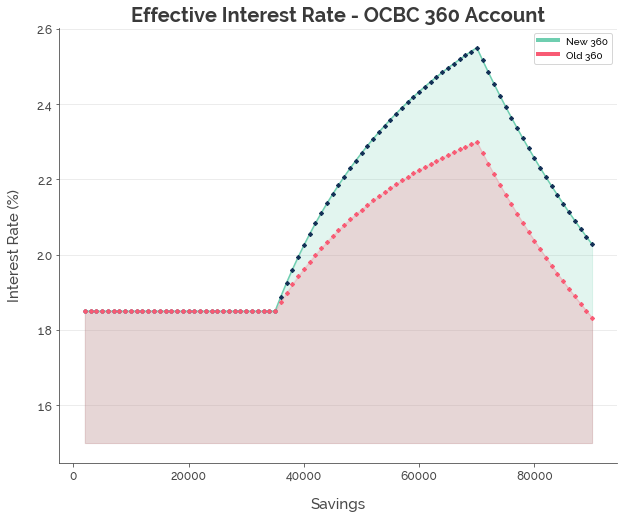

In [6]:
# Plot
plt.figure(figsize = (10,8))
ax = plt.gca()
ax.title.set_color('#3a3a3a')

# Plot new OCBC
plt.plot(ocbc.savings, ocbc.eir*100, color = '#6fceb0')
plt.plot(ocbc.savings, ocbc.eir*100, 'D', color = '#133056', markersize = 3)
plt.fill_between(x = ocbc.savings.values, y1 = ocbc.eir.values*100, y2 = 1.50, color = '#6fceb0', alpha = 0.2)

# Plot old OCBC
plt.plot(ocbc_old.savings, ocbc_old.eir*100, color = '#f85b74', alpha=0.1)
plt.plot(ocbc_old.savings, ocbc_old.eir*100, 'D', color = '#f85b74', markersize = 3)
plt.fill_between(x = ocbc_old.savings.values, y1 = ocbc_old.eir.values*100, y2 = 1.50, color = '#f85b74', alpha = 0.2)
plt.title('Effective Interest Rate - OCBC 360 Account', fontdict = {'fontweight': 'bold', 'fontsize': 20})
plt.ylabel('Interest Rate (%)', weight='medium')
plt.xlabel('Savings', weight='medium')

custom_bars = [Line2D([0], [0], color='#6fceb0', lw=4),
                Line2D([0], [0], color='#f85b74', lw=4)]
plt.legend(custom_bars, ['New 360', 'Old 360'], loc=0)

plt.show()

From the graph above, we see that the revised criteria for bonus interest on the 360 account result in higher interest at every level above \$35,000. The peak interest rate at \$70,000 is now **2.55%**.

## UOB One Account
Next, we use the same technique as in the first post to compute the yield curve for the One account.

In [7]:
# Set up table
uob = pd.DataFrame(np.arange(2000, 91000, 1000), columns = ['savings'])

# Compute base interest
uob['base_interest'] = uob.savings * 0.0005

# Create bracket
uob['bracket'] = 15000
uob['zero'] = 0

# Compute savings in excess of brackets
uob['f1'] = uob.savings - 0
uob['f2'] = uob.savings - 15000
uob['f3'] = uob.savings - 30000
uob['f4'] = uob.savings - 45000
uob['f5'] = uob.savings - 60000
uob['f6'] = uob.savings - 75000

uob['f1'] = uob[['f1', 'bracket']].min(axis = 1)
uob['f2'] = uob[['f2', 'bracket']].min(axis = 1)
uob['f3'] = uob[['f3', 'bracket']].min(axis = 1)
uob['f4'] = uob[['f4', 'bracket']].min(axis = 1)
uob['f5'] = uob[['f5', 'bracket']].min(axis = 1)
uob['f6'] = uob[['f6', 'bracket']].min(axis = 1)

# Create columns for savings within brackets
uob['s1'] = uob[['f1', 'zero']].max(axis = 1)
uob['s2'] = uob[['f2', 'zero']].max(axis = 1)
uob['s3'] = uob[['f3', 'zero']].max(axis = 1)
uob['s4'] = uob[['f4', 'zero']].max(axis = 1)
uob['s5'] = uob[['f5', 'zero']].max(axis = 1)
uob['s6'] = uob[['f6', 'zero']].max(axis = 1)

# Set up columns for bonus interest
uob['salary_giro'] = 0
uob['credit_cards'] = 0

# Compute interest for salary
uob.salary_giro = uob.s1 * 0.0035 + uob.s2 * 0.005 + uob.s3 * 0.0065 + \
    uob.s4 * 0.008 + uob.s5 * 0.0238

# Compute interest for credit cards
uob.credit_cards = 0.0145 * (uob.s1 + uob.s2 + uob.s3 + uob.s4 + uob.s5)

# Compute total interest
uob['total_interest'] = uob.base_interest + uob.salary_giro + uob.credit_cards

# Compute effective interest rate (EIR)
uob['eir'] = uob.total_interest / uob.savings

# Delete unnecessary columns
uob.drop(['s1', 's2', 's3', 's4', 's5', 's6', 
          'f1', 'f2', 'f3', 'f4', 'f5', 'f6'], axis = 1, inplace = True)

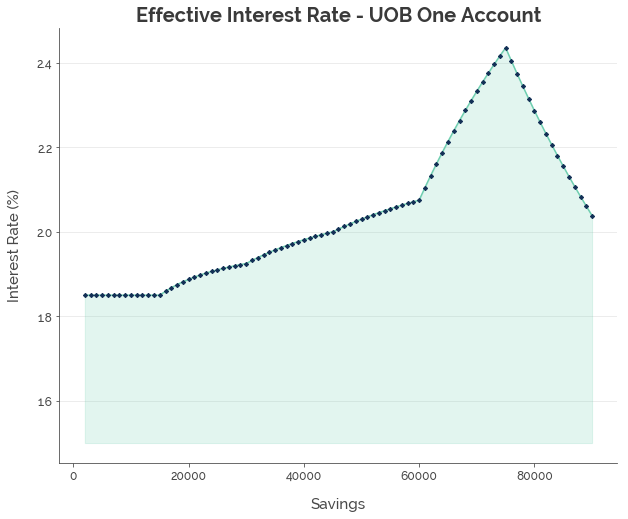

In [8]:
# Plot
plt.figure(figsize = (10,8))
ax = plt.gca()
ax.title.set_color('#3a3a3a')
plt.plot(uob.savings, uob.eir*100, color = '#6fceb0')
plt.plot(uob.savings, uob.eir*100, 'D', color = '#133056', markersize = 3)
plt.fill_between(x = uob.savings.values, y1 = uob.eir.values*100, y2 = 1.50, color = '#6fceb0', alpha = 0.2)
plt.title('Effective Interest Rate - UOB One Account', fontdict = {'fontweight': 'bold', 'fontsize': 20})
plt.ylabel('Interest Rate (%)', weight='medium')
plt.xlabel('Savings', weight='medium')
plt.show()

## MayBank SaveUp Account
With the changes in the SaveUp account criteria, the overall interest rate is substantially lower. Under the new rules, the SaveUp account hits a measly maximum of **1.065%** with savings of \$50,000, assuming we continue to meet the same 3 criteria. This is approximately one third the interest rate from before.

In [9]:
# Set up table
maybank_old = pd.DataFrame(np.arange(2000, 91000, 1000), columns = ['savings'])

# Create bonuses for base interest
maybank_old['zero'] = 0
maybank_old['base1'] = 3000
maybank_old['base2'] = 47000

maybank_old['b1'] = maybank_old.savings - 0
maybank_old['b2'] = maybank_old.savings - 3000
maybank_old['b3'] = maybank_old.savings - 47000

maybank_old['b1'] = maybank_old[['b1', 'base1']].copy().min(axis = 1)
maybank_old['b2'] = maybank_old[['b2', 'base2']].copy().min(axis = 1)

maybank_old['b2'] = maybank_old[['b2', 'zero']].copy().max(axis = 1)
maybank_old['b3'] = maybank_old[['b3', 'zero']].copy().max(axis = 1)

# Create brackets for bonuses
maybank_old['thresh'] = 60000
maybank_old['f1'] = maybank_old.savings - 0
maybank_old['f1'] = maybank_old[['f1', 'thresh']].copy().min(axis = 1)

# Calculate base interest
maybank_old['base_interest'] = maybank_old.b1 * 0.001875 + maybank_old.b2 * 0.0025 + \
    maybank_old.b3 * 0.003125

# Calculate interest from products
maybank_old['first_product'] = maybank_old.f1 * 0.003
maybank_old['second_product'] = maybank_old.f1 * 0.005
maybank_old['third_product'] = maybank_old.f1 * 0.0195

# Compute total interest
maybank_old['total_interest'] = maybank_old.base_interest + maybank_old.first_product + \
    maybank_old.second_product + maybank_old.third_product

# Compute effective interest rate (EIR)
maybank_old['eir'] = maybank_old.total_interest / maybank_old.savings

# Delete unnecessary columns
maybank_old.drop(['zero', 'base1', 'base2', 'b1', 'b2', 'b3', 'thresh',
             'f1'], axis = 1, inplace = True)

In [10]:
# Set up table
maybank = pd.DataFrame(np.arange(2000, 91000, 1000), columns = ['savings'])

# Create bonuses for base interest
maybank['zero'] = 0
maybank['base1'] = 3000
maybank['base2'] = 47000

maybank['b1'] = maybank.savings - 0
maybank['b2'] = maybank.savings - 3000
maybank['b3'] = maybank.savings - 47000

maybank['b1'] = maybank[['b1', 'base1']].copy().min(axis = 1)
maybank['b2'] = maybank[['b2', 'base2']].copy().min(axis = 1)

maybank['b2'] = maybank[['b2', 'zero']].copy().max(axis = 1)
maybank['b3'] = maybank[['b3', 'zero']].copy().max(axis = 1)

# Create brackets for bonuses
maybank['thresh'] = 50000
maybank['f1'] = maybank.savings - 0
maybank['f1'] = maybank[['f1', 'thresh']].copy().min(axis = 1)

# Calculate base interest
maybank['base_interest'] = maybank.b1 * 0.001875 + maybank.b2 * 0.0025 + \
    maybank.b3 * 0.003125

# Calculate interest from products
maybank['first_product'] = maybank.f1 * 0.003
maybank['second_product'] = maybank.f1 * 0.005

# Compute total interest
maybank['total_interest'] = maybank.base_interest + maybank.first_product + \
    maybank.second_product

# Compute effective interest rate (EIR)
maybank['eir'] = maybank.total_interest / maybank.savings

# Delete unnecessary columns
maybank.drop(['zero', 'base1', 'base2', 'b1', 'b2', 'b3', 'thresh',
             'f1'], axis = 1, inplace = True)

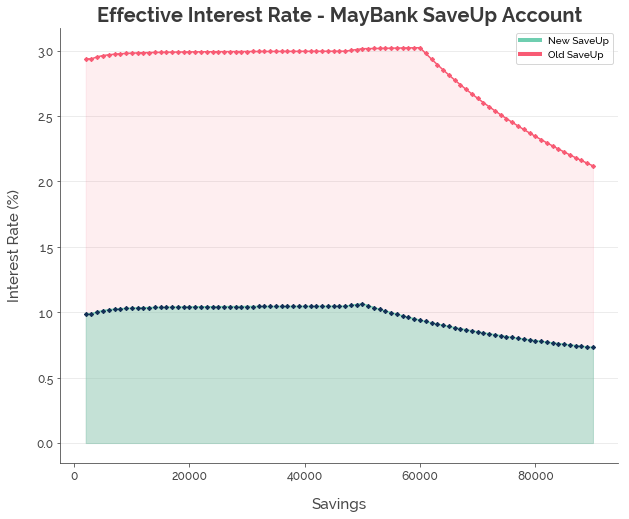

In [11]:
# Plot
plt.figure(figsize = (10,8))
ax = plt.gca()
ax.title.set_color('#3a3a3a')

# Plot old SaveUp
plt.plot(maybank_old.savings, maybank_old.eir*100, color = '#f85b74')
plt.plot(maybank_old.savings, maybank_old.eir*100, 'D', color = '#f85b74', markersize = 3)
plt.fill_between(x = maybank_old.savings.values, y1 = maybank_old.eir.values*100, y2 = 0.00, color = '#f85b74', alpha = 0.1)

# Plot new SaveUp
plt.plot(maybank.savings, maybank.eir*100, color = '#6fceb0')
plt.plot(maybank.savings, maybank.eir*100, 'D', color = '#133056', markersize = 3)
plt.fill_between(x = maybank.savings.values, y1 = maybank.eir.values*100, y2 = 0.00, color = '#6fceb0', alpha = 0.4)

plt.title('Effective Interest Rate - MayBank SaveUp Account', fontdict = {'fontweight': 'bold', 'fontsize': 20})
plt.ylabel('Interest Rate (%)', weight='medium')
plt.xlabel('Savings', weight='medium')

# Create legend
custom_bars = [Line2D([0], [0], color='#6fceb0', lw=4),
                Line2D([0], [0], color='#f85b74', lw=4)]
plt.legend(custom_bars, ['New SaveUp', 'Old SaveUp'], loc=0)

plt.show()

## DBS Multiplier
How much you save (interest rate) on the Multiplier account depends entirely on how much you spend - ironic isn't it? I omitted the Multiplier account from my first post because I thought that it was not useful for normal households. To capitalise on the high interest, clients would need to have a large bank balance, and must credit and spend a lot of money in a single month. In other words, ~~they must be rich to benefit from the account~~ DBS is targeting the customer segment with high net worth using this account.
  
However, after seeing how MayBank altered its policy and consequently, its standing in my books, I saw the value in including the Multiplier account as another option. For our computations, we only need to consider transactions per month from crediting salary and spending on credit cards. We will consider two brackets that I figure would apply to most households: (1) \$2,500 to \$5,000 and (2) \$5,000 to \$15,000. Assuming the transaction amounts are constant, the Multiplier simply pays consistent interest.

In [12]:
# Set up table
dbs = pd.DataFrame(np.arange(2000, 91000, 1000), columns = ['savings'])

# Add interest
dbs['eir_below_5k'] = 0.0185
dbs['eir_5k_to_15k'] = 0.019

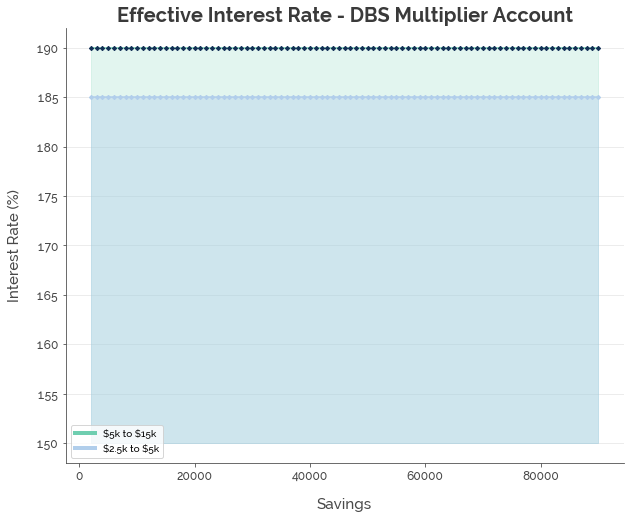

In [13]:
# Plot
plt.figure(figsize = (10,8))
ax = plt.gca()
ax.title.set_color('#3a3a3a')

# Plot $5k to $15k
plt.plot(dbs.savings, dbs.eir_5k_to_15k*100, color = '#6fceb0')
plt.plot(dbs.savings, dbs.eir_5k_to_15k*100, 'D', color = '#133056', markersize = 3)
plt.fill_between(x = dbs.savings.values, y1 = dbs.eir_5k_to_15k.values*100, y2 = 1.50, color = '#6fceb0', alpha = 0.2)

# Plot $2.5k to $5k
plt.plot(dbs.savings, dbs.eir_below_5k*100, color = '#b1ceeb')
plt.plot(dbs.savings, dbs.eir_below_5k*100, 'D', color = '#b1ceeb', markersize = 3)
plt.fill_between(x = dbs.savings.values, y1 = dbs.eir_below_5k.values*100, y2 = 1.50, color = '#b1ceeb', alpha = 0.4)



plt.title('Effective Interest Rate - DBS Multiplier Account', fontdict = {'fontweight': 'bold', 'fontsize': 20})
plt.ylabel('Interest Rate (%)', weight='medium')
plt.xlabel('Savings', weight='medium')

# Create legend
custom_bars = [Line2D([0], [0], color='#6fceb0', lw=4),
                Line2D([0], [0], color='#b1ceeb', lw=4)]
plt.legend(custom_bars, ['\$5k to \$15k', '\$2.5k to \$5k'], loc=0)
plt.show()

# Recommendations [TLDR]
  
## Optimal Bank Accounts

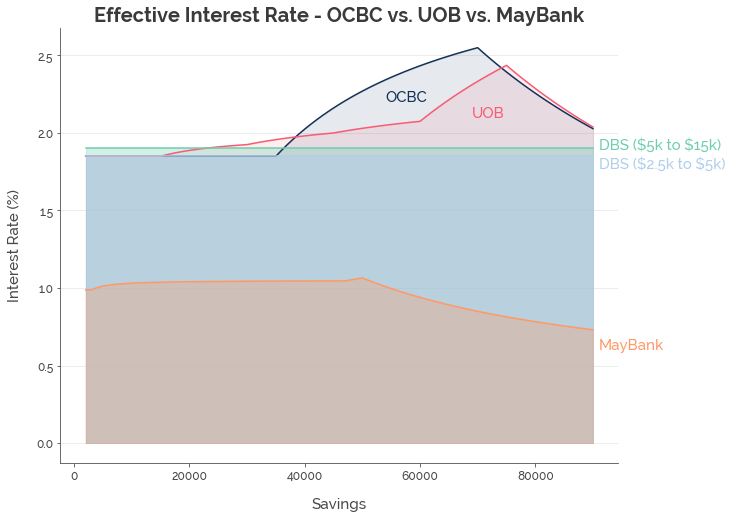

In [14]:
# Combine data
df = pd.DataFrame()
df['savings'] = ocbc.savings
df['ocbc_eir'] = ocbc.eir
df['uob_eir'] = uob.eir
df['maybank_eir'] = maybank.eir
df['dbs_eir_below5'] = dbs.eir_below_5k
df['dbs_eir_above5'] = dbs.eir_5k_to_15k
df['optimal'] = df.drop('savings', axis=1).apply(lambda x: x.idxmax(), axis=1)

# Plot
plt.figure(figsize = (10,8))
ax = plt.gca()
ax.title.set_color('#3a3a3a')
plt.fill_between(x = df.savings.values, y1 = df.ocbc_eir.values*100, y2 = 0, color = '#133056', alpha = 0.1)
plt.fill_between(x = df.savings.values, y1 = df.uob_eir.values*100, y2 = 0, color = '#f85b74', alpha = 0.1)
plt.fill_between(x = df.savings.values, y1 = df.dbs_eir_above5.values*100, y2 = 0, color = '#6fceb0', alpha = 0.3)
plt.fill_between(x = df.savings.values, y1 = df.dbs_eir_below5.values*100, y2 = 0, color = '#b1ceeb', alpha = 0.5)
plt.fill_between(x = df.savings.values, y1 = df.maybank_eir.values*100, y2 = 0, color = '#ff9966', alpha = 0.3)
plt.plot(df.savings, df.ocbc_eir*100, color = '#133056')
plt.plot(df.savings, df.uob_eir*100, color = '#f85b74')
plt.plot(df.savings, df.maybank_eir*100, color = '#ff9966')
plt.plot(df.savings, df.dbs_eir_above5*100, color = '#6fceb0')
plt.plot(df.savings, df.dbs_eir_below5*100, color = '#b1ceeb')
plt.text(x = 69000, y = 2.1, s = 'UOB', size = 15, color = '#f85b74')
plt.text(x = 54000, y = 2.2, s = 'OCBC', size = 15, color = '#133056')
plt.text(x = 91000, y = 1.89, s = 'DBS (\$5k to \$15k)', size = 15, color = '#6fceb0')
plt.text(x = 91000, y = 1.77, s = 'DBS (\$2.5k to \$5k)', size = 15, color = '#b1ceeb')
plt.text(x = 91000, y = 0.6, s = 'MayBank', size = 15, color = '#ff9966')
plt.title('Effective Interest Rate - OCBC vs. UOB vs. MayBank', fontdict = {'fontweight': 'bold', 'fontsize': 20})
plt.ylabel('Interest Rate (%)', weight='medium')
plt.xlabel('Savings', weight='medium')
plt.show()

#### Bank Balance of \$22,000 and Below
The first choice account is the **Multiplier**. If your monthly transactions (including salary crediting) exceed \$5,000, you will receive the highest interest rate in the market. If not, you would match the interest rate for the other bank accounts. The second choice is the **One** account because (1) it does not require you to credit your salary to earn a competitive rate, and (2) this account is the recommended option for the next bracket, which you probably will move into at some point.  
  
#### Bank Balance of \$22,000 to \$38,000
The first choice is the **One** account. Since this account does not require you to credit your salary, we have a conditional secondary recommendation.  
  
1. **Monthly Transactions of \$5,000 to \$15,000:** Get the *Multiplier* account for the 1.90% interest rate. 
2. **Monthly Transactions of \$2,500 to \$5,000:** Get the *360* account, because the interest rate becomes optimal as your bank balance approaches \$38,000.  
  
#### Bank  Balance of \$38,000 to \$74,000
The **360** account is the first choice. The peak interest rate is 2.55% when your bank balance hits \$70,000. The **One** account is the secondary choice because it complements the 360 accounts nicely through the GIRO transaction criterion.  
  
#### Bank Balance of \$74,000 and Above
The **One** account becomes the preferred account, while the **360** account becomes the secondary account. If you had both accounts open, no change in setup is required because the criteria from the two accounts are complementary.  
  
## Optimise Based on the Steady State
The banks entice customers with higher interest rates for finite periods of time. Here are some of the following criteria that typically award bonus interest for up to 12 months only:  
  
1. Insurance plans
2. Investment plans
3. Loans: education, car, or renovation
  
The only type of loan worth pursuing is the DBS Home Loan. There is no restriction on the amount of time that bonus interest is awarded. In addition, the Multiplier's interest rate for salary crediting plus 2 criteria is quite competitive for balances up to \$47,000.  
  
## Keep Your Options Open
Just 6 months ago, the SaveUp account was the optimal account to deposit your money, regardless of bank balance. Now, the SaveUp account does not feature as a primary or secondary choice under any circumstances. This shows how non-committal the banks can be. All banks "*may at their own discretion/reserve the right to vary the base interest rate and bonus interest rates"*. Yet, this does not mean that we should close our SaveUp accounts. Since the rates can change at any time, keep multiple accounts open for when these changes take place, and re-optimise accordingly.